In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Linear SVC Assignment

In [18]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


<IPython.core.display.Javascript object>

### Import the admissions data set (admissions.csv).

In [3]:
data = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv"
)
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


<IPython.core.display.Javascript object>

### Split the data into training and test sets, with the test set comprising 30% of the data.  Use `'Admitted'` as the target.

In [4]:
data["SchoolRank"].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: SchoolRank, dtype: int64

<IPython.core.display.Javascript object>

In [73]:
X = data.drop("Admitted", 1)
y = data["Admitted"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

<IPython.core.display.Javascript object>

In [74]:
# binary columns
bin_cols = ["Research"]

# numeric (and ordinal columns)
num_cols = ["GRE", "TOEFL", "SOP", "LOR", "GPA"]

# categorical columns and the corresponding categories to drop from each
cat_cols = ["SchoolRank"]
drop_cats = [3]

<IPython.core.display.Javascript object>

In [75]:
preprocessing = ColumnTransformer(
    [
        ("scale", StandardScaler(), num_cols),
        ("one_hot_encode", OneHotEncoder(drop=drop_cats), cat_cols),
    ]
)

<IPython.core.display.Javascript object>

### Generate an SVC model with a linear kernel. Set the regularization parameter (C) = 10. Check the score for both train and test sets. 

In [76]:
pipeline = Pipeline(
    [("preprocessing", preprocessing), ("svm", SVC(C=10.0, kernel="linear"))]
)

<IPython.core.display.Javascript object>

In [77]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scale',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['GRE', 'TOEFL', 'SOP', 'LOR',
                                                   'GPA']),
                                                 ('one_hot_encode',
                                                  OneHotEncoder(categories='auto',
                                                                drop=[3],
                                                                dtype=<class 'numpy.float64'>,
  

<IPython.core.display.Javascript object>

In [78]:
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Train score: 0.8714285714285714
Test score: 0.8666666666666667


<IPython.core.display.Javascript object>

### Choose some other values for C and show the difference between the scores for the train and test sets.

In [12]:
pipeline = Pipeline(
    [("preprocessing", preprocessing), ("svm", SVC(C=1, kernel="linear"))]
)

<IPython.core.display.Javascript object>

In [13]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scale',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['GRE', 'TOEFL', 'SOP', 'LOR',
                                                   'GPA']),
                                                 ('one_hot_encode',
                                                  OneHotEncoder(categories='auto',
                                                                drop=[3],
                                                                dtype=<class 'numpy.float64'>,
  

<IPython.core.display.Javascript object>

In [14]:
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Train score: 0.8821428571428571
Test score: 0.85


<IPython.core.display.Javascript object>

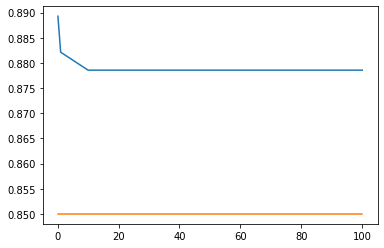

<IPython.core.display.Javascript object>

In [19]:
cs = [0.1, 1, 10, 100]
train_scores = []
test_scores = []
for c in cs:
    pipeline = Pipeline(
        [("preprocessing", preprocessing), ("svm", SVC(C=c, kernel="linear"))]
    )
    pipeline.fit(X_train, y_train)
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.plot(cs, train_scores)
plt.plot(cs, test_scores)

### What if we switched up the target variable? Let assume that we know whether a student was admitted. Let's try to predict what their SchoolRank was. 

Create an SVC model with a linear kernel with the SchoolRank field as the target variable. Report both the train and the test scores.

In [63]:
X = data.drop(["SchoolRank", "TOEFL"], 1)
y = data["SchoolRank"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

<IPython.core.display.Javascript object>

In [64]:
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


<IPython.core.display.Javascript object>

In [65]:
# binary columns
bin_cols = ["Admitted", "Research"]

# numeric (and ordinal columns)
num_cols = ["GRE", "SOP", "LOR", "GPA"]

# categorical columns and the corresponding categories to drop from each
cat_cols = []
drop_cats = []

<IPython.core.display.Javascript object>

In [66]:
preprocessing = ColumnTransformer([("scale", StandardScaler(), num_cols)])

<IPython.core.display.Javascript object>

In [70]:
pipeline = Pipeline(
    [("preprocessing", preprocessing), ("svm", SVC(C=10, kernel="linear"))]
)

<IPython.core.display.Javascript object>

In [71]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scale',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['GRE', 'SOP', 'LOR',
                                                   'GPA'])],
                                   verbose=False)),
                ('svm',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=Fa

<IPython.core.display.Javascript object>

In [72]:
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Train score: 0.6642857142857143
Test score: 0.5333333333333333


<IPython.core.display.Javascript object>

### Show confusion matrices for the training and test sets, and a classification report for the test set. What trends do you notice?

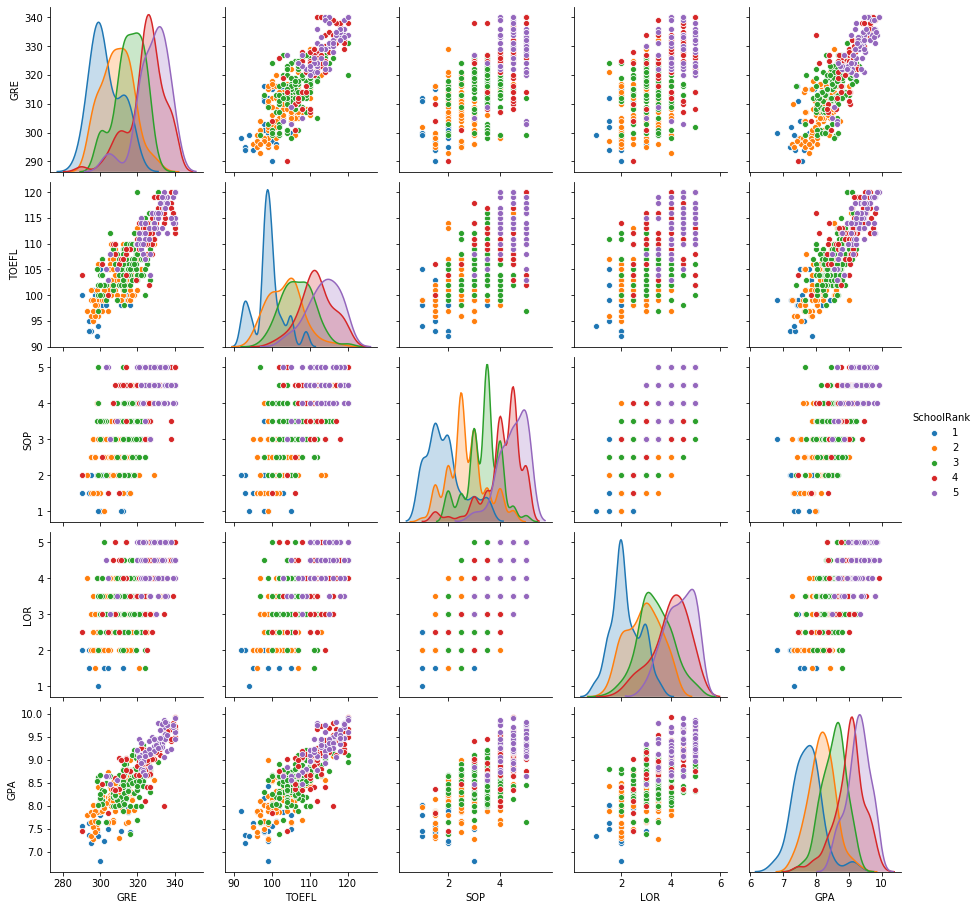

<IPython.core.display.Javascript object>

In [62]:
sns.pairplot(data=data.drop(["Research", "Admitted"], 1), hue="SchoolRank")

In [43]:
y_pred = pipeline.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[ 5,  2,  1,  0,  0],
       [ 5, 17, 10,  0,  0],
       [ 0,  9, 26,  4,  1],
       [ 0,  1,  2, 11,  8],
       [ 0,  0,  3,  7,  8]], dtype=int64)

<IPython.core.display.Javascript object>

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.62      0.56         8
           2       0.59      0.53      0.56        32
           3       0.62      0.65      0.63        40
           4       0.50      0.50      0.50        22
           5       0.47      0.44      0.46        18

    accuracy                           0.56       120
   macro avg       0.54      0.55      0.54       120
weighted avg       0.56      0.56      0.56       120



<IPython.core.display.Javascript object>